## importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

## Load the dataset

In [3]:
data = pd.read_csv("salary.csv")
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
data.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


## Data Description

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## EDA

In [6]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

<AxesSubplot:xlabel='capital-gain', ylabel='count'>

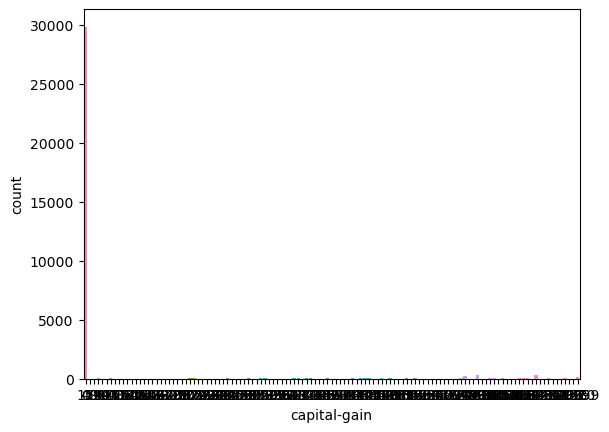

In [7]:
sns.countplot(data=data,x='capital-gain')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Bachelors'),
  Text(1, 0, 'HS-grad'),
  Text(2, 0, '11th'),
  Text(3, 0, 'Masters'),
  Text(4, 0, '9th'),
  Text(5, 0, 'Some-college'),
  Text(6, 0, 'Assoc-acdm'),
  Text(7, 0, 'Assoc-voc'),
  Text(8, 0, '7th-8th'),
  Text(9, 0, 'Doctorate'),
  Text(10, 0, 'Prof-school'),
  Text(11, 0, '5th-6th'),
  Text(12, 0, '10th'),
  Text(13, 0, '1st-4th'),
  Text(14, 0, 'Preschool'),
  Text(15, 0, '12th')])

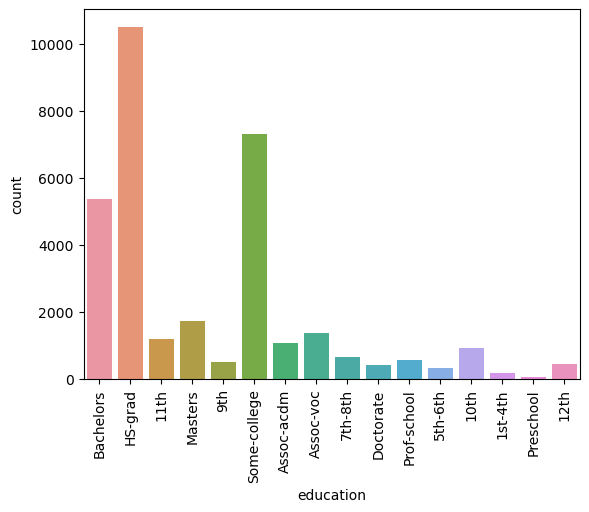

In [8]:
data["education"] = [cols.replace(' ', '') for cols in data["education"]]
sns.countplot(data=data,x='education')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'State-gov'),
  Text(1, 0, 'Self-emp-not-inc'),
  Text(2, 0, 'Private'),
  Text(3, 0, 'Federal-gov'),
  Text(4, 0, 'Local-gov'),
  Text(5, 0, '?'),
  Text(6, 0, 'Self-emp-inc'),
  Text(7, 0, 'Without-pay'),
  Text(8, 0, 'Never-worked')])

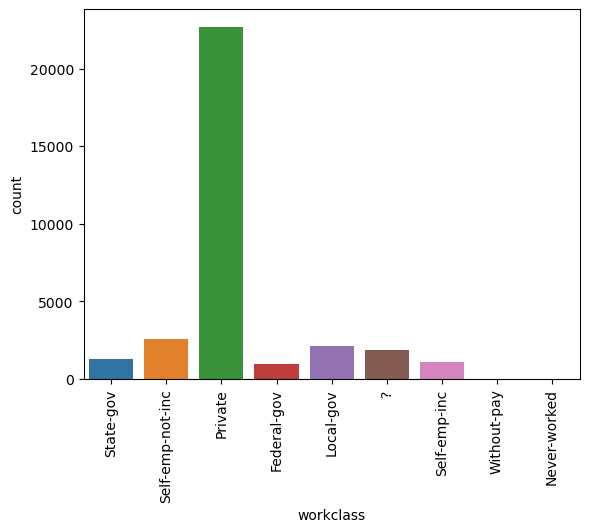

In [9]:
data["workclass"] = [cols.replace(' ', '') for cols in data["workclass"]]
sns.countplot(data=data,x='workclass')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Never-married'),
  Text(1, 0, 'Married-civ-spouse'),
  Text(2, 0, 'Divorced'),
  Text(3, 0, 'Married-spouse-absent'),
  Text(4, 0, 'Separated'),
  Text(5, 0, 'Married-AF-spouse'),
  Text(6, 0, 'Widowed')])

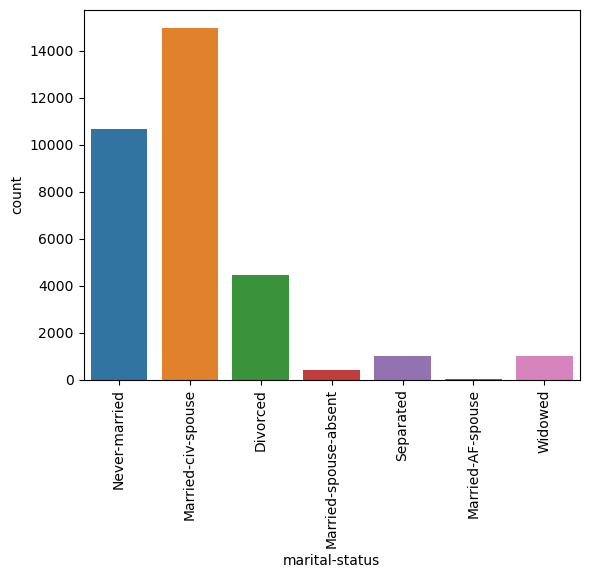

In [10]:
data["marital-status"] = [cols.replace(' ', '') for cols in data["marital-status"]]
sns.countplot(data=data,x='marital-status')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, 'United-States'),
  Text(1, 0, 'Cuba'),
  Text(2, 0, 'Jamaica'),
  Text(3, 0, 'India'),
  Text(4, 0, '?'),
  Text(5, 0, 'Mexico'),
  Text(6, 0, 'South'),
  Text(7, 0, 'Puerto-Rico'),
  Text(8, 0, 'Honduras'),
  Text(9, 0, 'England'),
  Text(10, 0, 'Canada'),
  Text(11, 0, 'Germany'),
  Text(12, 0, 'Iran'),
  Text(13, 0, 'Philippines'),
  Text(14, 0, 'Italy'),
  Text(15, 0, 'Poland'),
  Text(16, 0, 'Columbia'),
  Text(17, 0, 'Cambodia'),
  Text(18, 0, 'Thailand'),
  Text(19, 0, 'Ecuador'),
  Text(20, 0, 'Laos'),
  Text(21, 0, 'Taiwan'),
  Text(22, 0, 'Haiti'),
  Text(23, 0, 'Portugal'),
  Text(24, 0, 'Dominican-Republic'),
  Text(25, 0, 'El-Salvador'),
  Text(26, 0, 'France'),
  Text(27, 0, 'Guatemala'),
  Text(28, 0, 'China'),
  Text(29, 0, 'Japan'),
  Text(30, 0, 'Yugoslavia'),
  T

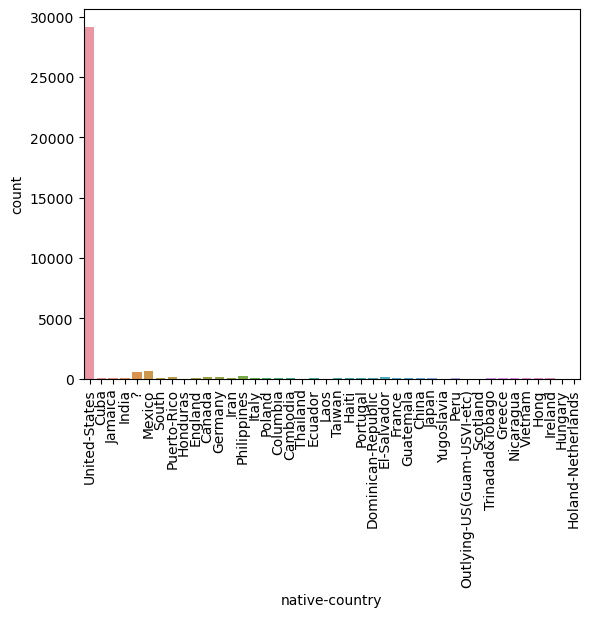

In [11]:
data["native-country"] = [cols.replace(' ', '') for cols in data["native-country"]]
sns.countplot(data=data,x='native-country')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Adm-clerical'),
  Text(1, 0, 'Exec-managerial'),
  Text(2, 0, 'Handlers-cleaners'),
  Text(3, 0, 'Prof-specialty'),
  Text(4, 0, 'Other-service'),
  Text(5, 0, 'Sales'),
  Text(6, 0, 'Craft-repair'),
  Text(7, 0, 'Transport-moving'),
  Text(8, 0, 'Farming-fishing'),
  Text(9, 0, 'Machine-op-inspct'),
  Text(10, 0, 'Tech-support'),
  Text(11, 0, '?'),
  Text(12, 0, 'Protective-serv'),
  Text(13, 0, 'Armed-Forces'),
  Text(14, 0, 'Priv-house-serv')])

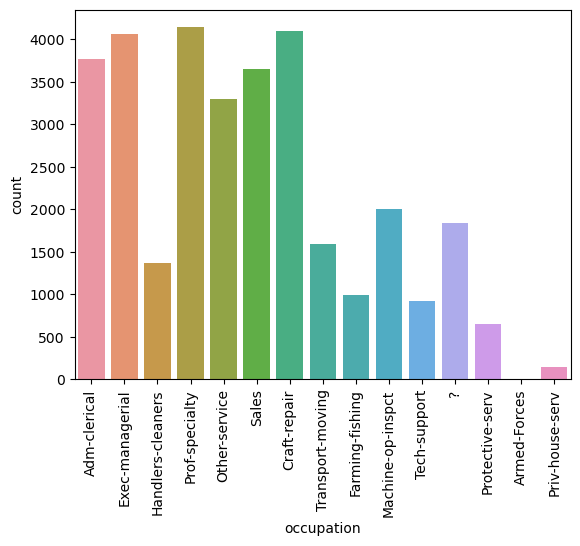

In [12]:
data["occupation"] = [cols.replace(' ', '') for cols in data["occupation"]]
sns.countplot(data=data,x='occupation')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Not-in-family'),
  Text(1, 0, 'Husband'),
  Text(2, 0, 'Wife'),
  Text(3, 0, 'Own-child'),
  Text(4, 0, 'Unmarried'),
  Text(5, 0, 'Other-relative')])

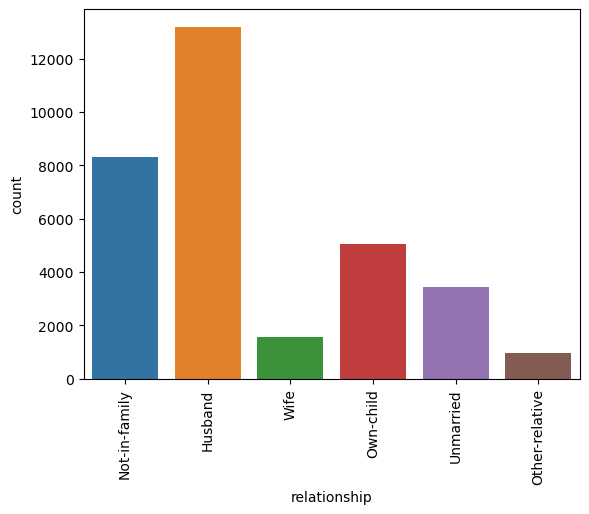

In [13]:
data["relationship"] = [cols.replace(' ', '') for cols in data["relationship"]]
sns.countplot(data=data,x='relationship')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'White'),
  Text(1, 0, 'Black'),
  Text(2, 0, 'Asian-Pac-Islander'),
  Text(3, 0, 'Amer-Indian-Eskimo'),
  Text(4, 0, 'Other')])

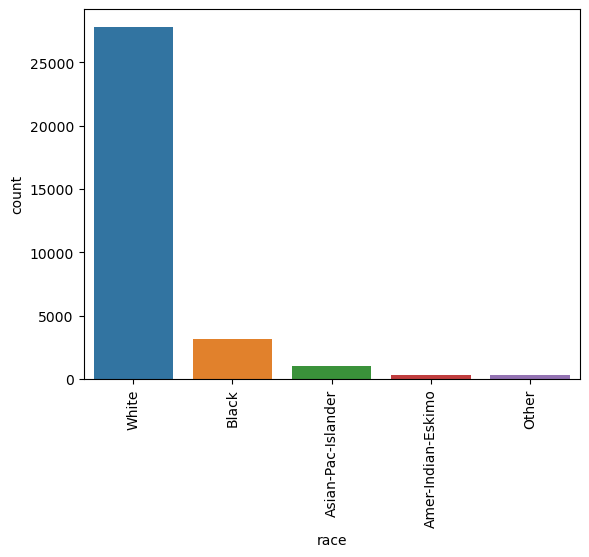

In [14]:
data["race"] = [cols.replace(' ', '') for cols in data["race"]]
sns.countplot(data=data,x='race')
plt.xticks(rotation=90)

(array([0, 1]), [Text(0, 0, 'Male'), Text(1, 0, 'Female')])

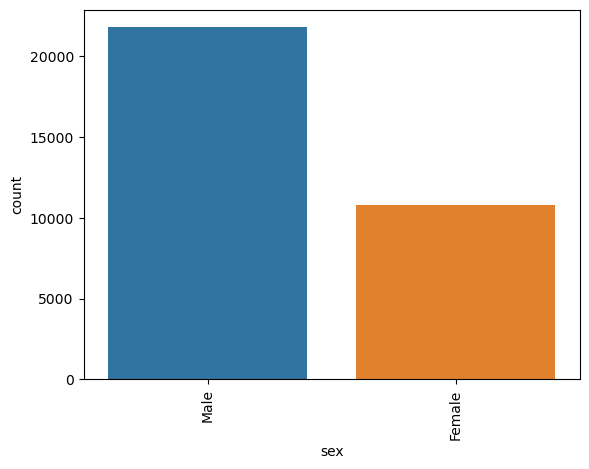

In [17]:
data["sex"] = [cols.replace(' ', '') for cols in data["sex"]]
sns.countplot(data=data,x='sex')
plt.xticks(rotation=90)

## Filling Up missing values

In [18]:
data = data.replace('?', np.nan)

In [19]:
# Chechking null values 
def about_data(df):
    total_missing_values = df.isnull().sum().reset_index()
    total_missing_values = total_missing_values.rename(columns={'index':'columns',0:'total missing'})
    total_missing_values['ration of missing'] = total_missing_values['total missing']/len(df)
    return total_missing_values
about_data(data)

,columns,total missing,ration of missing
0,age,0,0.000000
1,workclass,1836,0.056386
2,fnlwgt,0,0.000000
3,education,0,0.000000
4,education-num,0,0.000000
5,marital-status,0,0.000000
6,occupation,1843,0.056601
7,relationship,0,0.000000
8,race,0,0.000000
9,sex,0,0.000000


In [20]:
about_data(data)

,columns,total missing,ration of missing
0,age,0,0.000000
1,workclass,1836,0.056386
2,fnlwgt,0,0.000000
3,education,0,0.000000
4,education-num,0,0.000000
5,marital-status,0,0.000000
6,occupation,1843,0.056601
7,relationship,0,0.000000
8,race,0,0.000000
9,sex,0,0.000000


In [21]:
data.dropna(inplace=True,axis=0)
about_data(data)

,columns,total missing,ration of missing
0,age,0,0.0
1,workclass,0,0.0
2,fnlwgt,0,0.0
3,education,0,0.0
4,education-num,0,0.0
5,marital-status,0,0.0
6,occupation,0,0.0
7,relationship,0,0.0
8,race,0,0.0
9,sex,0,0.0


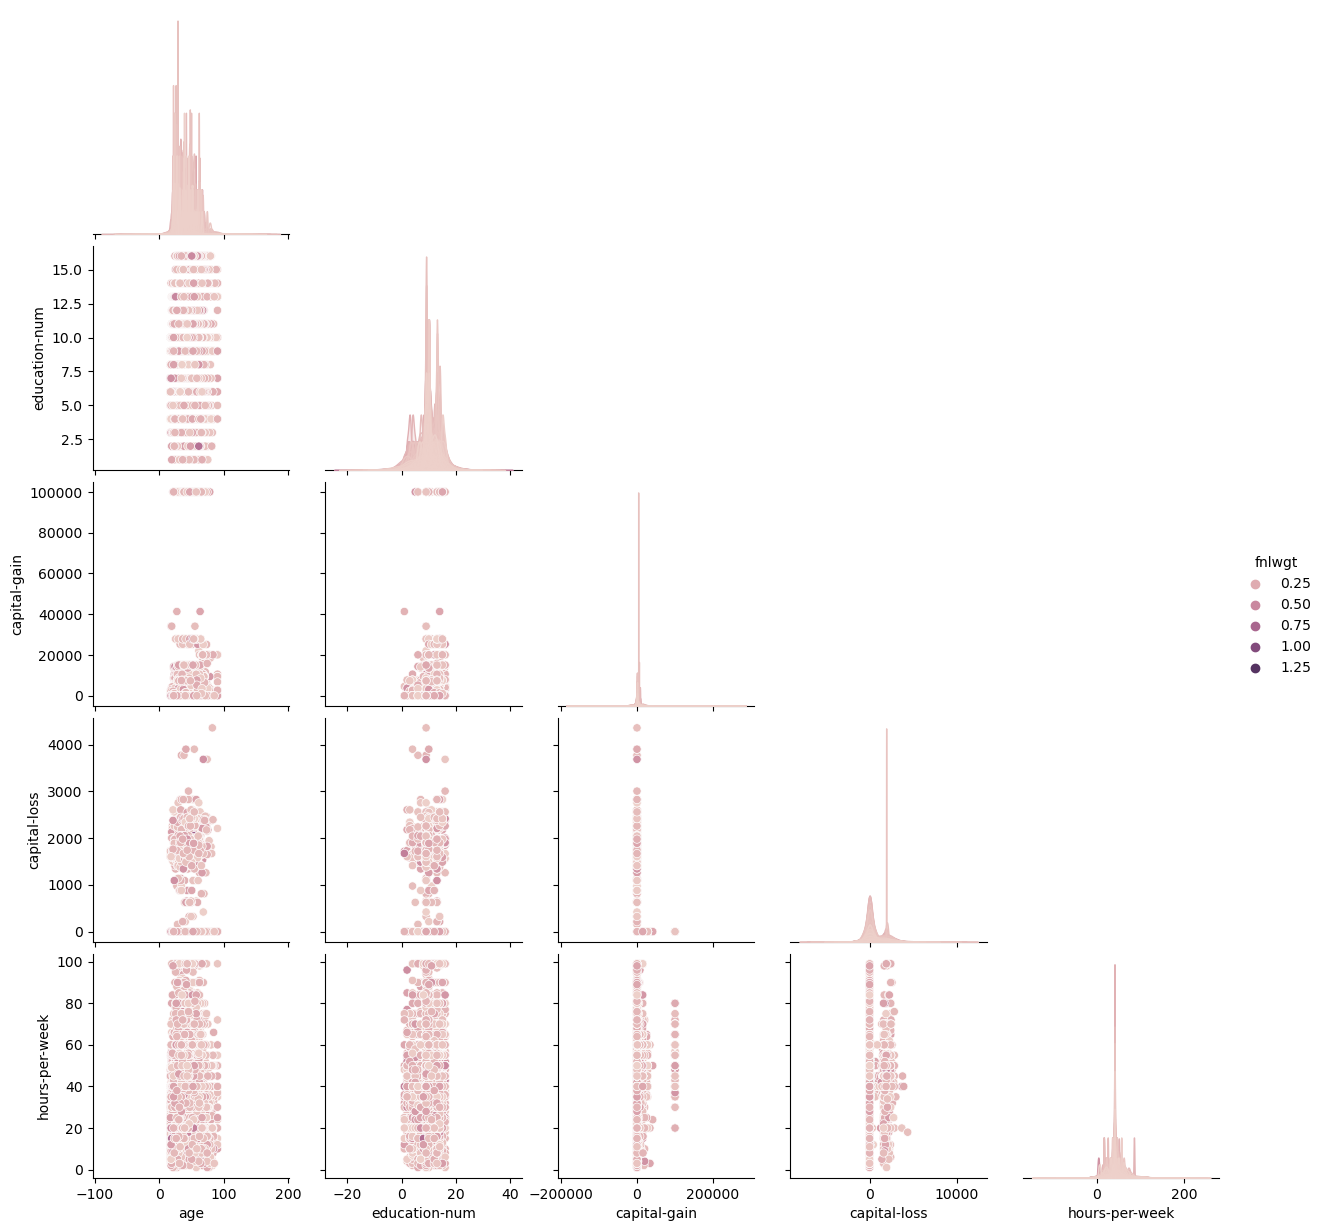

In [22]:
sns.pairplot(data,hue='fnlwgt',corner=True)

<AxesSubplot:>

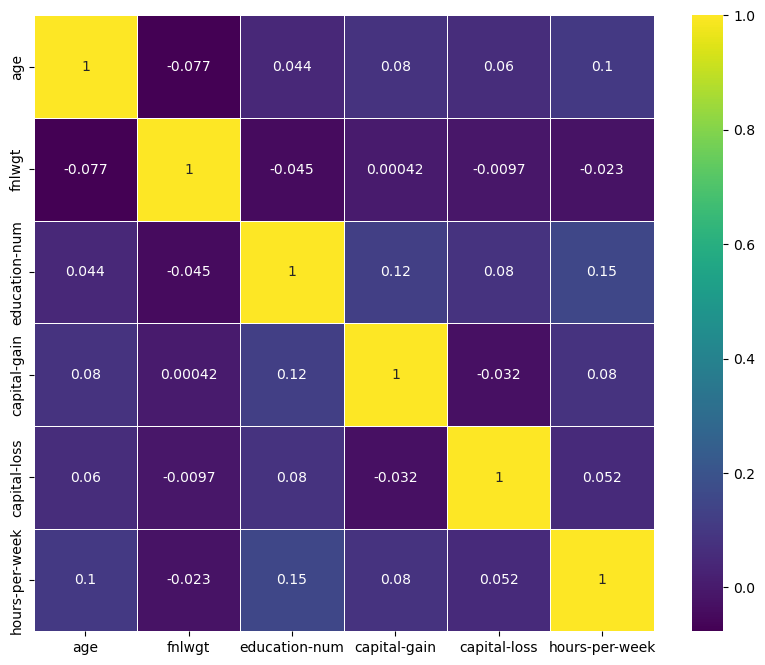

In [23]:
plt.figure(figsize=(10,8),dpi=100)
sns.heatmap(data.corr(),cmap="viridis",annot=True,linewidth=0.5)

### Drop unnecessary columns

In [24]:
data.drop(['fnlwgt'], axis=1, inplace=True)

### Encode categorical features

In [27]:
categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
for feature in categorical_features:
    le = LabelEncoder()
    data[feature] = le.fit_transform(data[feature])

### Split the dataset into training and testing sets

In [28]:
X = data.drop('salary', axis=1)
y = data['salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

###  Scale the features

In [29]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Decision Tree Classifier

In [30]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Classifier:\n", classification_report(y_test, y_pred_dt))

Decision Tree Classifier:
               precision    recall  f1-score   support

       <=50K       0.87      0.87      0.87      6767
        >50K       0.62      0.62      0.62      2282

    accuracy                           0.81      9049
   macro avg       0.75      0.74      0.74      9049
weighted avg       0.81      0.81      0.81      9049



## K-Nearest Neighbors Classifier 

In [31]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("K-Nearest Neighbors Classifier:\n", classification_report(y_test, y_pred_knn))

K-Nearest Neighbors Classifier:
               precision    recall  f1-score   support

       <=50K       0.87      0.91      0.89      6767
        >50K       0.69      0.60      0.64      2282

    accuracy                           0.83      9049
   macro avg       0.78      0.75      0.77      9049
weighted avg       0.82      0.83      0.83      9049



## Support Vector Machine Classifier 

In [32]:
svc = SVC(random_state=42)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
print("Support Vector Machine Classifier:\n", classification_report(y_test, y_pred_svc))

Support Vector Machine Classifier:
               precision    recall  f1-score   support

       <=50K       0.86      0.95      0.90      6767
        >50K       0.78      0.56      0.65      2282

    accuracy                           0.85      9049
   macro avg       0.82      0.75      0.78      9049
weighted avg       0.84      0.85      0.84      9049

